In [1]:
pwd

'/content'

In [1]:
%pushd /content
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True)

/content


In [4]:
import numpy as np
import pandas as pd

In [5]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2024, 12, 28, 17, 17, 12, 204366)

In [6]:
now.year, now.month, now.day

(2024, 12, 28)

In [7]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [8]:
delta.days

926

In [9]:
delta.seconds

56700

In [10]:
from datetime import timedelta

start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [11]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [12]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [13]:
stamp.strftime("%Y-%m-%d")

'2011-01-03'

In [14]:
value = "2011-01-03"
datetime.strptime(value, "%Y-%m-%d")

datetime.datetime(2011, 1, 3, 0, 0)

In [15]:
datestrs = ["7/6/2011", "8/6/2011"]
[datetime.strptime(x, "%m/%d/%Y") for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

- Funkcja `pd.to_datetime()` w bibliotece Pandas jest używana do konwersji różnych formatów daty i czasu na obiekty datetime. W przypadku podanego zapytania, gdzie masz listę ciągów dat, funkcja ta zamienia te ciągi na format datetime, co jest przydatne w analizie danych czasowych.

In [16]:
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"]
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [17]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [18]:
idx[2]

NaT

In [19]:
pd.isna(idx)

array([False, False,  True])

In [20]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.standard_normal(6), index=dates)
ts

,0
2011-01-02,-0.204708
2011-01-05,0.478943
2011-01-07,-0.519439
2011-01-08,-0.555730
2011-01-10,1.965781
2011-01-12,1.393406


In [21]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [23]:
ts[::2]

,0
2011-01-02,-0.204708
2011-01-07,-0.519439
2011-01-10,1.965781


In [24]:
ts

,0
2011-01-02,-0.204708
2011-01-05,0.478943
2011-01-07,-0.519439
2011-01-08,-0.555730
2011-01-10,1.965781
2011-01-12,1.393406


In [22]:
ts + ts[::2]

,0
2011-01-02,-0.409415
2011-01-05,NaN
2011-01-07,-1.038877
2011-01-08,NaN
2011-01-10,3.931561
2011-01-12,NaN


In [25]:
ts.index.dtype

dtype('<M8[ns]')

In [26]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

In [27]:
stamp = ts.index[2]
ts[stamp]

-0.5194387150567381

In [28]:
ts["2011-01-10"]

1.9657805725027142

In [29]:
longer_ts = pd.Series(np.random.standard_normal(1000),
                      index=pd.date_range("2000-01-01", periods=1000))
longer_ts
longer_ts["2001"]

,0
2001-01-01,1.599534
2001-01-02,0.474071
2001-01-03,0.151326
2001-01-04,-0.542173
2001-01-05,-0.475496
...,...
2001-12-27,0.057874
2001-12-28,-0.433739
2001-12-29,0.092698
2001-12-30,-1.397820


In [30]:
longer_ts["2001-05"]

,0
2001-05-01,-0.622547
2001-05-02,0.936289
2001-05-03,0.750018
2001-05-04,-0.056715
2001-05-05,2.300675
...,...
2001-05-27,0.235477
2001-05-28,0.111835
2001-05-29,-1.251504
2001-05-30,-2.949343


In [31]:
ts

,0
2011-01-02,-0.204708
2011-01-05,0.478943
2011-01-07,-0.519439
2011-01-08,-0.555730
2011-01-10,1.965781
2011-01-12,1.393406


In [32]:
ts[datetime(2011, 1, 7):]

,0
2011-01-07,-0.519439
2011-01-08,-0.555730
2011-01-10,1.965781
2011-01-12,1.393406


In [33]:
ts[datetime(2011, 1, 7):datetime(2011, 1, 10)]

,0
2011-01-07,-0.519439
2011-01-08,-0.555730
2011-01-10,1.965781


In [34]:
ts

,0
2011-01-02,-0.204708
2011-01-05,0.478943
2011-01-07,-0.519439
2011-01-08,-0.555730
2011-01-10,1.965781
2011-01-12,1.393406


In [35]:
ts["2011-01-06":"2011-01-11"]

,0
2011-01-07,-0.519439
2011-01-08,-0.555730
2011-01-10,1.965781


- W przypadku `ts.truncate(after="2011-01-09")`, wszystkie dane po dacie 9 stycznia 2011 roku zostaną usunięte.

In [36]:
ts.truncate(after="2011-01-09")

,0
2011-01-02,-0.204708
2011-01-05,0.478943
2011-01-07,-0.519439
2011-01-08,-0.555730


In [39]:
dates = pd.date_range("2000-01-01", periods=100, freq="W-WED")
dates[:5]

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02'],
              dtype='datetime64[ns]', freq='W-WED')

In [40]:
long_df = pd.DataFrame(np.random.standard_normal((100, 4)),
                       index=dates,
                       columns=["Colorado", "Texas",
                                "New York", "Ohio"])

long_df[:5]

,Colorado,Texas,New York,Ohio
2000-01-05,0.488675,-0.178098,2.122315,0.061192
2000-01-12,0.884111,-0.608506,-0.072052,0.544066
2000-01-19,0.323886,-1.683325,0.526860,1.858791
2000-01-26,-0.548419,-0.279397,-0.021299,-0.287990
2000-02-02,0.089175,0.522858,0.572796,-1.760372


- Tworzenie zakresu dat: Używamy `pd.date_range`, aby stworzyć zakres dat zaczynający się od 1 stycznia 2000 roku. Ustawiamy `periods=100`, co oznacza, że chcemy uzyskać 100 dat, a `freq="W-WED"` oznacza, że daty będą przypadały na środy.

In [43]:
dates = pd.date_range("2000-01-01", periods=100, freq="W-WED")
long_df = pd.DataFrame(np.random.standard_normal((100, 4)),
                       index=dates,
                       columns=["Colorado", "Texas",
                                "New York", "Ohio"])
long_df.loc["2001-02"]

,Colorado,Texas,New York,Ohio
2001-02-07,-0.250439,-0.151218,0.166420,-0.718974
2001-02-14,-0.823032,0.477885,-0.573430,0.373544
2001-02-21,0.606128,0.483893,0.447850,0.321877
2001-02-28,-1.295372,0.355685,-0.697173,0.727872


In [44]:
dates = pd.DatetimeIndex(["2000-01-01", "2000-01-02", "2000-01-02",
                          "2000-01-02", "2000-01-03"])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

,0
2000-01-01,0
2000-01-02,1
2000-01-02,2
2000-01-02,3
2000-01-03,4


In [45]:
dup_ts.index.is_unique

False

In [46]:
dup_ts["2000-01-03"]  # not duplicated

4

In [47]:
dup_ts["2000-01-02"]  # duplicated

,0
2000-01-02,1
2000-01-02,2
2000-01-02,3


In [48]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

,0
2000-01-01,0.0
2000-01-02,2.0
2000-01-03,4.0


In [49]:
grouped.count()

,0
2000-01-01,1
2000-01-02,3
2000-01-03,1


In [50]:
ts

,0
2011-01-02,-0.204708
2011-01-05,0.478943
2011-01-07,-0.519439
2011-01-08,-0.555730
2011-01-10,1.965781
2011-01-12,1.393406


In [51]:
resampler = ts.resample("D")
resampler

In [52]:
index = pd.date_range("2012-04-01", "2012-06-01")
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [53]:
pd.date_range(start="2012-04-01", periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [54]:
pd.date_range(end="2012-06-01", periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

- Aby utworzyć zakres dat w Pandas od 1 stycznia 2000 roku do 1 grudnia 2000 roku z częstotliwością “BM” (Business Month End), możesz użyć funkcji `pd.date_range()`. Częstotliwość “BM” generuje daty, które przypadają na koniec miesiąca roboczego.

In [55]:
pd.date_range("2000-01-01", "2000-12-01", freq="BM")

<ipython-input-55-b072f5bd3d9f>:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  pd.date_range("2000-01-01", "2000-12-01", freq="BM")


DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BME')

In [56]:
pd.date_range("2012-05-02 12:56:31", periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [57]:
pd.date_range("2012-05-02 12:56:31", periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

- Importowanie bibliotek: Importujemy Pandas oraz klasy `Hour` i `Minute` z modułu `pandas.tseries.offsets`.
- Tworzenie obiektów: Tworzymy instancje klas `Hour` i `Minute`, które reprezentują odpowiednio przesunięcie o jedną godzinę i jedną minutę.

In [59]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
print(hour)

<Hour>


In [60]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [61]:
pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4H")

<ipython-input-61-40c73449e66d>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4H")


DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4h')

In [62]:
Hour(2) + Minute(30)

<150 * Minutes>

In [63]:
pd.date_range("2000-01-01", periods=10, freq="1h30min")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90min')

- Używając funkcji `pd.date_range()` w Pandas z parametrem `freq="WOM-3FRI"`, generujesz daty odpowiadające trzeciemu piątkowi każdego miesiąca w określonym przedziale czasowym.

In [64]:
monthly_dates = pd.date_range("2012-01-01", "2012-09-01", freq="WOM-3FRI")
list(monthly_dates)

[Timestamp('2012-01-20 00:00:00'),
 Timestamp('2012-02-17 00:00:00'),
 Timestamp('2012-03-16 00:00:00'),
 Timestamp('2012-04-20 00:00:00'),
 Timestamp('2012-05-18 00:00:00'),
 Timestamp('2012-06-15 00:00:00'),
 Timestamp('2012-07-20 00:00:00'),
 Timestamp('2012-08-17 00:00:00')]

- W podanym przez Ciebie kodzie tworzysz obiekt `Series` w Pandas, który zawiera losowe wartości oraz daty jako indeks. Używasz częstotliwości `"ME"`, co oznacza “Month End” (koniec miesiąca).

In [66]:
ts = pd.Series(np.random.standard_normal(4),
               index=pd.date_range("2000-01-01", periods=4, freq="ME"))
ts

,0
2000-01-31,0.160621
2000-02-29,1.359500
2000-03-31,0.791455
2000-04-30,1.894683


- Metoda `shift()` w Pandas jest używana do przesuwania wartości w obiekcie `Series` lub `DataFrame` w górę lub w dół wzdłuż osi. Używając `ts.shift(2)`, przesuwasz wartości w obiekcie `Series` o 2 jednostki w dół.

In [2]:
ts = pd.Series(np.random.standard_normal(4),
               index=pd.date_range("2000-01-01", periods=4, freq="ME"))
ts
ts.shift(2)

,0
2000-01-31,NaN
2000-02-29,NaN
2000-03-31,-0.204708
2000-04-30,0.478943


In [3]:
ts.shift(-2)

,0
2000-01-31,-0.519439
2000-02-29,-0.555730
2000-03-31,NaN
2000-04-30,NaN


- Przesunięcie: Używasz metody `shift(2, freq="ME")`, co oznacza, że przesuwasz wartości o 2 miesiące do przodu. Indeks zostanie zmieniony zgodnie z częstotliwością “Month End”.

In [4]:
ts.shift(2, freq="ME")

,0
2000-03-31,-0.204708
2000-04-30,0.478943
2000-05-31,-0.519439
2000-06-30,-0.555730


- Używając metody `shift()` w Pandas z argumentem `freq="D"` i przesunięciem o 3 jednostki, przesuwasz wartości w obiekcie `Series` lub `DataFrame` o 3 dni do przodu.

In [5]:
ts.shift(3, freq="D")

,0
2000-02-03,-0.204708
2000-03-03,0.478943
2000-04-03,-0.519439
2000-05-03,-0.555730


- Metoda `shift()` w Pandas z argumentem `freq="90min"` służy do przesuwania wartości w obiekcie `Series` lub `DataFrame` o określoną liczbę jednostek czasowych, w tym przypadku o 90 minut.


In [8]:
ts

,0
2000-01-31,-0.204708
2000-02-29,0.478943
2000-03-31,-0.519439
2000-04-30,-0.555730


In [7]:
ts.shift(1, freq="90min")

,0
2000-01-31 01:30:00,-0.204708
2000-02-29 01:30:00,0.478943
2000-03-31 01:30:00,-0.519439
2000-04-30 01:30:00,-0.555730


- Importowanie bibliotek: Importujesz Pandas oraz klasę `Day` z `pandas.tseries.offsets`. Importujesz również `datetime` z modułu `datetime`, aby móc ustawić datę.
- Ustalenie daty początkowej: Tworzysz obiekt `datetime` reprezentujący 17 listopada 2011 roku.
- Dodawanie dni: Używasz operatora dodawania, aby dodać 3 dni do daty. Klasa `Day()` reprezentuje przesunięcie o jeden dzień, a mnożenie przez 3 oznacza przesunięcie o trzy dni.

In [11]:
from pandas.tseries.offsets import Day, MonthEnd
from datetime import datetime

now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [12]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [13]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [14]:
MonthEnd()

<MonthEnd>

In [16]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [17]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [18]:
ts = pd.Series(np.random.standard_normal(20),
               index=pd.date_range("2000-01-15", periods=20, freq="4D"))
ts

,0
2000-01-15,1.965781
2000-01-19,1.393406
2000-01-23,0.092908
2000-01-27,0.281746
2000-01-31,0.769023
2000-02-04,1.246435
2000-02-08,1.007189
2000-02-12,-1.296221
2000-02-16,0.274992
2000-02-20,0.228913


- Grupowanie po końcu miesiąca: `MonthEnd().rollforward` przesuwa daty do ostatniego dnia miesiąca. Oznacza to, że wszystkie daty w danym miesiącu będą grupowane razem.
- Obliczanie średniej: Po zgrupowaniu danych, wywołanie `.mean()` oblicza średnią wartość dla każdej grupy.

In [19]:
ts.groupby(MonthEnd().rollforward).mean()

,0
2000-01-31,0.900573
2000-02-29,0.528665
2000-03-31,0.127742


- Resampling: Metoda `resample()` jest używana do zmiany częstotliwości danych czasowych. W tym przypadku `"M"` oznacza, że chcesz przekształcić dane do końca miesiąca.

In [20]:
ts

,0
2000-01-15,1.965781
2000-01-19,1.393406
2000-01-23,0.092908
2000-01-27,0.281746
2000-01-31,0.769023
2000-02-04,1.246435
2000-02-08,1.007189
2000-02-12,-1.296221
2000-02-16,0.274992
2000-02-20,0.228913


In [22]:
ts.resample("ME").mean()

,0
2000-01-31,0.900573
2000-02-29,0.528665
2000-03-31,0.127742


- `pytz.common_timezones`: Jest to lista powszechnie używanych stref czasowych, które są aktualne i nie zawierają przestarzałych lub historycznych stref.
- Indeksowanie: Użycie `-5:` pozwala na uzyskanie ostatnich pięciu elementów z tej listy.

In [23]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [24]:
tz = pytz.timezone("America/New_York")
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [25]:
dates = pd.date_range("2012-03-09 09:30", periods=6)
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

,0
2012-03-09 09:30:00,-0.577087
2012-03-10 09:30:00,0.124121
2012-03-11 09:30:00,0.302614
2012-03-12 09:30:00,0.523772
2012-03-13 09:30:00,0.000940
2012-03-14 09:30:00,1.343810


In [26]:
print(ts.index.tz)

None


- Używając funkcji `pd.date_range()` w Pandas, możesz wygenerować zakres dat z określoną strefą czasową. W Twoim przypadku tworzysz zakres dat zaczynający się od “2012-03-09 09:30” z 10 okresami, a strefa czasowa to “UTC”.

In [27]:
pd.date_range("2012-03-09 09:30", periods=10, tz="UTC")

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [28]:
ts

,0
2012-03-09 09:30:00,-0.577087
2012-03-10 09:30:00,0.124121
2012-03-11 09:30:00,0.302614
2012-03-12 09:30:00,0.523772
2012-03-13 09:30:00,0.000940
2012-03-14 09:30:00,1.343810


- Lokalizacja strefy czasowej: Używasz metody `tz_localize("UTC")`, aby przypisać strefę czasową UTC do indeksu datowego w obiekcie `Series`.

In [29]:
ts_utc = ts.tz_localize("UTC")
ts_utc

,0
2012-03-09 09:30:00+00:00,-0.577087
2012-03-10 09:30:00+00:00,0.124121
2012-03-11 09:30:00+00:00,0.302614
2012-03-12 09:30:00+00:00,0.523772
2012-03-13 09:30:00+00:00,0.000940
2012-03-14 09:30:00+00:00,1.343810


In [30]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [31]:
ts_utc.tz_convert("America/New_York")

,0
2012-03-09 04:30:00-05:00,-0.577087
2012-03-10 04:30:00-05:00,0.124121
2012-03-11 05:30:00-04:00,0.302614
2012-03-12 05:30:00-04:00,0.523772
2012-03-13 05:30:00-04:00,0.000940
2012-03-14 05:30:00-04:00,1.343810


In [32]:
ts_eastern = ts.tz_localize("America/New_York")
ts_eastern

,0
2012-03-09 09:30:00-05:00,-0.577087
2012-03-10 09:30:00-05:00,0.124121
2012-03-11 09:30:00-04:00,0.302614
2012-03-12 09:30:00-04:00,0.523772
2012-03-13 09:30:00-04:00,0.000940
2012-03-14 09:30:00-04:00,1.343810


In [33]:
ts_eastern.tz_convert("UTC")
ts_eastern

,0
2012-03-09 09:30:00-05:00,-0.577087
2012-03-10 09:30:00-05:00,0.124121
2012-03-11 09:30:00-04:00,0.302614
2012-03-12 09:30:00-04:00,0.523772
2012-03-13 09:30:00-04:00,0.000940
2012-03-14 09:30:00-04:00,1.343810


In [34]:
ts_eastern.tz_convert("Europe/Berlin")
ts_eastern

,0
2012-03-09 09:30:00-05:00,-0.577087
2012-03-10 09:30:00-05:00,0.124121
2012-03-11 09:30:00-04:00,0.302614
2012-03-12 09:30:00-04:00,0.523772
2012-03-13 09:30:00-04:00,0.000940
2012-03-14 09:30:00-04:00,1.343810


In [35]:
ts.index.tz_localize("Asia/Shanghai")
ts

,0
2012-03-09 09:30:00,-0.577087
2012-03-10 09:30:00,0.124121
2012-03-11 09:30:00,0.302614
2012-03-12 09:30:00,0.523772
2012-03-13 09:30:00,0.000940
2012-03-14 09:30:00,1.343810


In [36]:
stamp = pd.Timestamp("2011-03-12 04:00")
stamp

Timestamp('2011-03-12 04:00:00')

In [37]:
stamp_utc = stamp.tz_localize("utc")
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [38]:
stamp_utc.tz_convert("America/New_York")
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [41]:
stamp_warsaw= pd.Timestamp("2011-03-12 04:00", tz="Europe/Warsaw")
stamp_warsaw

Timestamp('2011-03-12 04:00:00+0100', tz='Europe/Warsaw')

In [42]:
stamp_utc.value

1299902400000000000

In [43]:
stamp_utc.tz_convert("America/New_York").value

1299902400000000000

In [44]:
stamp = pd.Timestamp("2012-03-11 01:30", tz="US/Eastern")
stamp

Timestamp('2012-03-11 01:30:00-0500', tz='US/Eastern')

In [46]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()

In [47]:
stamp + Hour()

Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

In [48]:
stamp

Timestamp('2012-03-11 01:30:00-0500', tz='US/Eastern')

In [49]:
stamp + 2 * Hour()

Timestamp('2012-03-11 04:30:00-0400', tz='US/Eastern')

In [50]:
dates = pd.date_range("2012-03-07 09:30", periods=10, freq="B")
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

,0
2012-03-07 09:30:00,-0.713544
2012-03-08 09:30:00,-0.831154
2012-03-09 09:30:00,-2.370232
2012-03-12 09:30:00,-1.860761
2012-03-13 09:30:00,-0.860757
2012-03-14 09:30:00,0.560145
2012-03-15 09:30:00,-1.265934
2012-03-16 09:30:00,0.119827
2012-03-19 09:30:00,-1.063512
2012-03-20 09:30:00,0.332883


In [52]:
ts1 = ts[:7].tz_localize("Europe/London")
ts2 = ts1[2:].tz_convert("Europe/Warsaw")
result = ts1 + ts2
result

,0
2012-03-07 09:30:00+00:00,NaN
2012-03-08 09:30:00+00:00,NaN
2012-03-09 09:30:00+00:00,-4.740463
2012-03-12 09:30:00+00:00,-3.721522
2012-03-13 09:30:00+00:00,-1.721515
2012-03-14 09:30:00+00:00,1.120291
2012-03-15 09:30:00+00:00,-2.531869


In [53]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

- Tworzysz obiekt `Period` dla roku 2011 z częstotliwością `"Y-DEC"`, co oznacza, że okres ten kończy się w grudniu.

In [55]:
p = pd.Period("2011", freq="Y-DEC")
p

Period('2011', 'Y-DEC')

In [56]:
p + 5

Period('2016', 'Y-DEC')

In [57]:
p - 2

Period('2009', 'Y-DEC')

- Aby obliczyć różnicę między dwoma obiektami `Period` w Pandas, możesz po prostu odjąć jeden od drugiego. W Twoim przypadku chcesz obliczyć różnicę między okresem “2014” (z częstotliwością `"Y-DEC"`) a okresem `p`, który reprezentuje rok 2011.

In [59]:
pd.Period("2014", freq="Y-DEC") - p

<3 * YearEnds: month=12>

In [60]:
periods = pd.period_range("2000-01-01", "2000-06-30", freq="M")
periods

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [61]:
pd.Series(np.random.standard_normal(6), index=periods)

,0
2000-01,-2.359419
2000-02,-0.199543
2000-03,-1.541996
2000-04,-0.970736
2000-05,-1.307030
2000-06,0.286350


In [62]:
values = ["2001Q3", "2002Q2", "2003Q1"]
index = pd.PeriodIndex(values, freq="Q-DEC")
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

In [64]:
p = pd.Period("2011", freq="Y-DEC")
p

Period('2011', 'Y-DEC')

In [67]:
p.asfreq("M", how="start")

Period('2011-01', 'M')

In [68]:
p.asfreq("M", how="end")

Period('2011-12', 'M')

In [69]:
p.asfreq("M")

Period('2011-12', 'M')

In [71]:
p = pd.Period("2011", freq="Y-JUN")
p

Period('2011', 'Y-JUN')

In [72]:
p.asfreq("M", how="start")

Period('2010-07', 'M')

In [73]:
p.asfreq("M", how="end")

Period('2011-06', 'M')

In [75]:
p = pd.Period("Aug-2011", "M")
p.asfreq("Y-JUN")

Period('2012', 'Y-JUN')

In [77]:
periods = pd.period_range("2006", "2009", freq="Y-DEC")
ts = pd.Series(np.random.standard_normal(len(periods)), index=periods)
ts
ts.asfreq("M", how="start")

,0
2006-01,0.069877
2007-01,0.246674
2008-01,-0.011862
2009-01,1.004812


In [78]:
ts.asfreq("B", how="end")

<ipython-input-78-7309666d1d41>:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ts.asfreq("B", how="end")


,0
2006-12-29,0.069877
2007-12-31,0.246674
2008-12-31,-0.011862
2009-12-31,1.004812


In [79]:
p = pd.Period("2012Q4", freq="Q-JAN")
p

Period('2012Q4', 'Q-JAN')

In [81]:
p.asfreq("D", how="start")

Period('2011-11-01', 'D')

In [82]:
p.asfreq("D", how="end")

Period('2012-01-31', 'D')

In [83]:
p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60
p4pm

<ipython-input-83-ee17b3371727>:1: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60
<ipython-input-83-ee17b3371727>:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60


Period('2012-01-30 16:00', 'min')

In [84]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [85]:
periods = pd.period_range("2011Q3", "2012Q4", freq="Q-JAN")
ts = pd.Series(np.arange(len(periods)), index=periods)
ts

,0
2011Q3,0
2011Q4,1
2012Q1,2
2012Q2,3
2012Q3,4
2012Q4,5


In [86]:
new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 16
ts.index = new_periods.to_timestamp()
ts

<ipython-input-86-863d9d51a01c>:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 16
<ipython-input-86-863d9d51a01c>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 16


,0
2010-10-28 16:00:00,0
2011-01-28 16:00:00,1
2011-04-28 16:00:00,2
2011-07-28 16:00:00,3
2011-10-28 16:00:00,4
2012-01-30 16:00:00,5


In [87]:
dates = pd.date_range("2000-01-01", periods=3, freq="M")
ts = pd.Series(np.random.standard_normal(3), index=dates)
ts
pts = ts.to_period()
pts

<ipython-input-87-8c0d555525f2>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range("2000-01-01", periods=3, freq="M")


,0
2000-01,1.327195
2000-02,-0.919262
2000-03,-1.549106


In [88]:
dates = pd.date_range("2000-01-29", periods=6)
ts2 = pd.Series(np.random.standard_normal(6), index=dates)
ts2
ts2.to_period("M")

,0
2000-01,0.022185
2000-01,0.758363
2000-01,-0.660524
2000-02,0.862580
2000-02,-0.010032
2000-02,0.050009


In [89]:
pts = ts2.to_period()
pts
pts.to_timestamp(how="end")

,0
2000-01-29 23:59:59.999999999,0.022185
2000-01-30 23:59:59.999999999,0.758363
2000-01-31 23:59:59.999999999,-0.660524
2000-02-01 23:59:59.999999999,0.862580
2000-02-02 23:59:59.999999999,-0.010032
2000-02-03 23:59:59.999999999,0.050009


In [90]:
data = pd.read_csv("/content/macrodata.csv")
data.head(5)
data["year"]
data["quarter"]

,quarter
0,1
1,2
2,3
3,4
4,1
...,...
198,3
199,4
200,1
201,2


In [91]:
index = pd.PeriodIndex(year=data["year"], quarter=data["quarter"],
                       freq="Q-DEC")
index
data.index = index
data["infl"]

<ipython-input-91-6fd9fd7d73d3>:1: FutureWarning: Constructing PeriodIndex from fields is deprecated. Use PeriodIndex.from_fields instead.
  index = pd.PeriodIndex(year=data["year"], quarter=data["quarter"],


,infl
1959Q1,0.00
1959Q2,2.34
1959Q3,2.74
1959Q4,0.27
1960Q1,2.31
...,...
2008Q3,-3.16
2008Q4,-8.79
2009Q1,0.94
2009Q2,3.37


In [92]:
dates = pd.date_range("2000-01-01", periods=100)
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts
ts.resample("M").mean()
ts.resample("M", kind="period").mean()

<ipython-input-92-3fa028c86e3f>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample("M").mean()
<ipython-input-92-3fa028c86e3f>:5: FutureWarning: The 'kind' keyword in Series.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  ts.resample("M", kind="period").mean()
<ipython-input-92-3fa028c86e3f>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample("M", kind="period").mean()


,0
2000-01,0.123743
2000-02,-0.198731
2000-03,0.005887
2000-04,-0.207093


In [93]:
dates = pd.date_range("2000-01-01", periods=12, freq="T")
ts = pd.Series(np.arange(len(dates)), index=dates)
ts

<ipython-input-93-5b61bc9f16bc>:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  dates = pd.date_range("2000-01-01", periods=12, freq="T")


,0
2000-01-01 00:00:00,0
2000-01-01 00:01:00,1
2000-01-01 00:02:00,2
2000-01-01 00:03:00,3
2000-01-01 00:04:00,4
2000-01-01 00:05:00,5
2000-01-01 00:06:00,6
2000-01-01 00:07:00,7
2000-01-01 00:08:00,8
2000-01-01 00:09:00,9


In [94]:
ts.resample("5min").sum()

,0
2000-01-01 00:00:00,10
2000-01-01 00:05:00,35
2000-01-01 00:10:00,21


In [95]:
ts.resample("5min", closed="right").sum()

,0
1999-12-31 23:55:00,0
2000-01-01 00:00:00,15
2000-01-01 00:05:00,40
2000-01-01 00:10:00,11


In [96]:
ts.resample("5min", closed="right", label="right").sum()

,0
2000-01-01 00:00:00,0
2000-01-01 00:05:00,15
2000-01-01 00:10:00,40
2000-01-01 00:15:00,11


In [97]:
from pandas.tseries.frequencies import to_offset
result = ts.resample("5min", closed="right", label="right").sum()
result.index = result.index + to_offset("-1s")
result

,0
1999-12-31 23:59:59,0
2000-01-01 00:04:59,15
2000-01-01 00:09:59,40
2000-01-01 00:14:59,11


In [98]:
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index=dates)
ts.resample("5min").ohlc()

,open,high,low,close
2000-01-01 00:00:00,9,11,0,11
2000-01-01 00:05:00,6,8,2,4
2000-01-01 00:10:00,5,7,5,7


In [99]:
frame = pd.DataFrame(np.random.standard_normal((2, 4)),
                     index=pd.date_range("2000-01-01", periods=2,
                                         freq="W-WED"),
                     columns=["Colorado", "Texas", "New York", "Ohio"])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,2.068708,-0.730034,1.436791,-0.624245
2000-01-12,-0.832461,-0.635728,-0.458300,-0.750079


In [100]:
df_daily = frame.resample("D").asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,2.068708,-0.730034,1.436791,-0.624245
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.832461,-0.635728,-0.458300,-0.750079


In [101]:
frame.resample("D").ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,2.068708,-0.730034,1.436791,-0.624245
2000-01-06,2.068708,-0.730034,1.436791,-0.624245
2000-01-07,2.068708,-0.730034,1.436791,-0.624245
2000-01-08,2.068708,-0.730034,1.436791,-0.624245
2000-01-09,2.068708,-0.730034,1.436791,-0.624245
2000-01-10,2.068708,-0.730034,1.436791,-0.624245
2000-01-11,2.068708,-0.730034,1.436791,-0.624245
2000-01-12,-0.832461,-0.635728,-0.458300,-0.750079


In [102]:
frame.resample("D").ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,2.068708,-0.730034,1.436791,-0.624245
2000-01-06,2.068708,-0.730034,1.436791,-0.624245
2000-01-07,2.068708,-0.730034,1.436791,-0.624245
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.832461,-0.635728,-0.458300,-0.750079


In [103]:
frame.resample("W-THU").ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,2.068708,-0.730034,1.436791,-0.624245
2000-01-13,-0.832461,-0.635728,-0.458300,-0.750079


In [105]:
frame = pd.DataFrame(np.random.standard_normal((24, 4)),
                     index=pd.period_range("1-2000", "12-2001",
                                           freq="M"),
                     columns=["Colorado", "Texas", "New York", "Ohio"])
frame.head()
annual_frame = frame.resample("Y-DEC").mean()
annual_frame

<ipython-input-105-68f0c95bfc78>:6: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame = frame.resample("Y-DEC").mean()


,Colorado,Texas,New York,Ohio
2000,0.066385,-0.000450,-0.222564,0.117246
2001,0.093845,0.187986,-0.088362,0.046690


In [106]:
annual_frame.resample("Q-DEC").ffill()
annual_frame.resample("Q-DEC", convention="end").asfreq()

<ipython-input-106-0c6bd3c42fa9>:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC").ffill()
<ipython-input-106-0c6bd3c42fa9>:2: FutureWarning: The 'convention' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast PeriodIndex to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC", convention="end").asfreq()
<ipython-input-106-0c6bd3c42fa9>:2: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC", convention="end").asfreq()


,Colorado,Texas,New York,Ohio
2000Q4,0.066385,-0.000450,-0.222564,0.117246
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,0.093845,0.187986,-0.088362,0.046690


In [107]:
annual_frame.resample("Q-MAR").ffill()

<ipython-input-107-59f8b003523d>:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-MAR").ffill()


,Colorado,Texas,New York,Ohio
2000Q4,0.066385,-0.000450,-0.222564,0.117246
2001Q1,0.066385,-0.000450,-0.222564,0.117246
2001Q2,0.066385,-0.000450,-0.222564,0.117246
2001Q3,0.066385,-0.000450,-0.222564,0.117246
2001Q4,0.093845,0.187986,-0.088362,0.046690
2002Q1,0.093845,0.187986,-0.088362,0.046690
2002Q2,0.093845,0.187986,-0.088362,0.046690
2002Q3,0.093845,0.187986,-0.088362,0.046690


In [108]:
N = 15
times = pd.date_range("2017-05-20 00:00", freq="1min", periods=N)
df = pd.DataFrame({"czas": times,
                   "wartość": np.arange(N)})
df

,czas,wartość
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [109]:
df.set_index("czas").resample("5min").count()

,wartość
czas,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [110]:
df2 = pd.DataFrame({"czas": times.repeat(3),
                    "klucz": np.tile(["a", "b", "c"], N),
                    "wartość": np.arange(N * 3.)})
df2.head(7)

,czas,klucz,wartość
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0


In [111]:
time_key = pd.Grouper(freq="5min")

In [112]:
resampled = (df2.set_index("czas")
             .groupby(["klucz", time_key])
             .sum())
resampled
resampled.reset_index()

,klucz,czas,wartość
0,a,2017-05-20 00:00:00,30.0
1,a,2017-05-20 00:05:00,105.0
2,a,2017-05-20 00:10:00,180.0
3,b,2017-05-20 00:00:00,35.0
4,b,2017-05-20 00:05:00,110.0
5,b,2017-05-20 00:10:00,185.0
6,c,2017-05-20 00:00:00,40.0
7,c,2017-05-20 00:05:00,115.0
8,c,2017-05-20 00:10:00,190.0


In [113]:
close_px_all = pd.read_csv("/content/akcje.csv",
                           parse_dates=True, index_col=0)
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]
close_px = close_px.resample("B").ffill()

<Axes: >

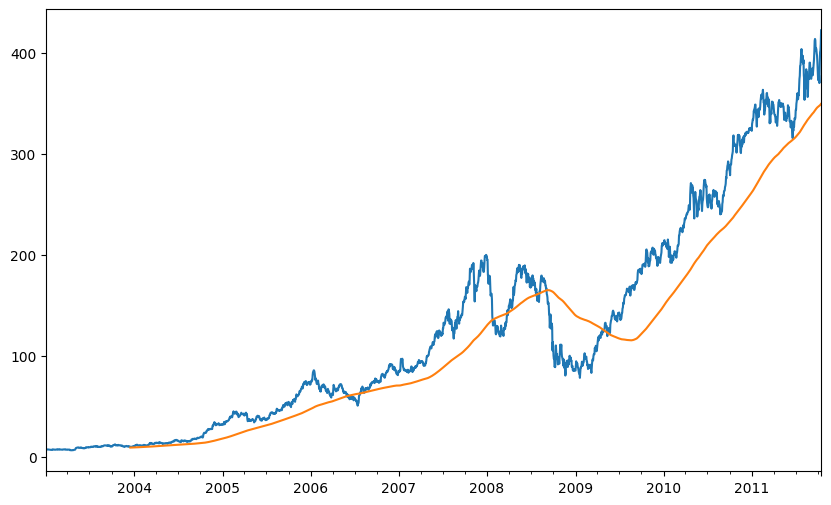

In [114]:
close_px["AAPL"].plot()
close_px["AAPL"].rolling(250).mean().plot()

<Axes: >

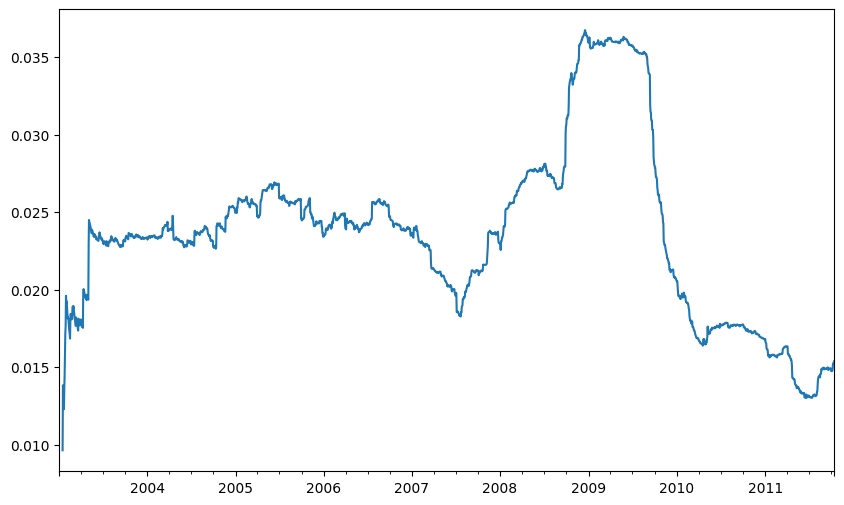

In [115]:
plt.figure()
std250 = close_px["AAPL"].pct_change().rolling(250, min_periods=10).std()
std250[5:12]
std250.plot()

In [116]:
expanding_mean = std250.expanding().mean()

In [117]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: >

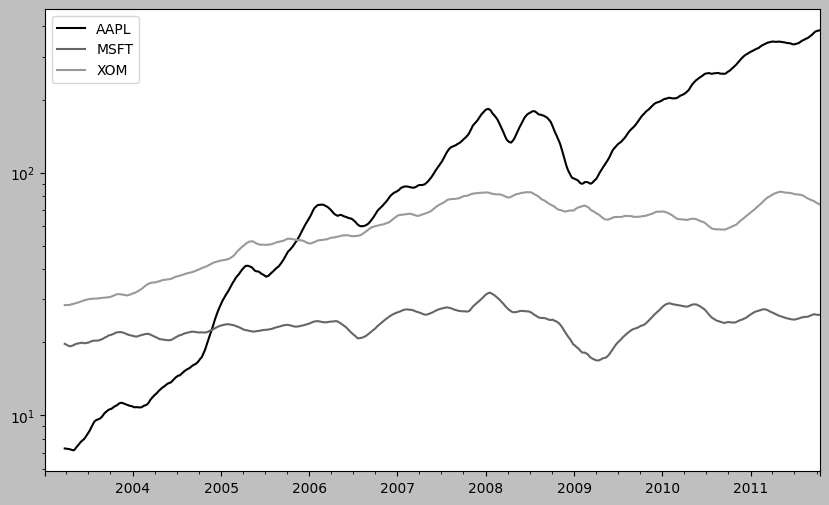

In [118]:
plt.style.use('grayscale')
close_px.rolling(60).mean().plot(logy=True)

In [119]:
close_px.rolling("20D").mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


In [120]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

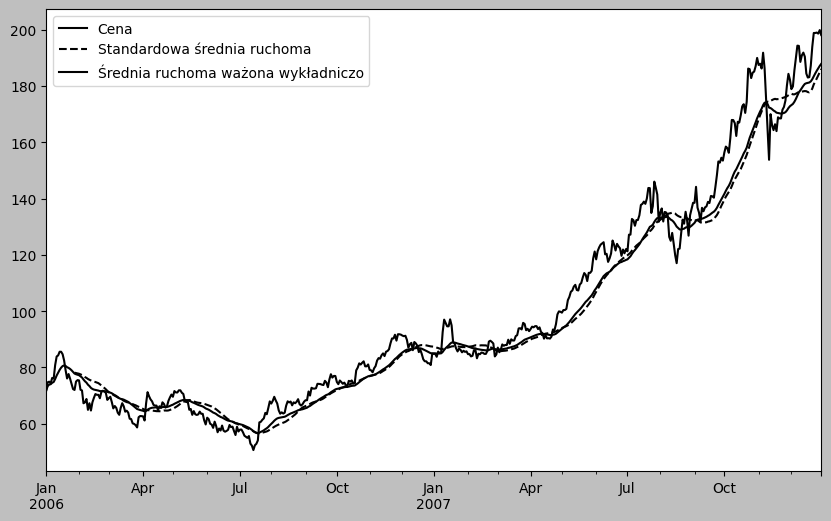

In [121]:
aapl_px = close_px["AAPL"]["2006":"2007"]

ma30 = aapl_px.rolling(30, min_periods=20).mean()
ewma30 = aapl_px.ewm(span=30).mean()

aapl_px.plot(style="k-", label="Cena")
ma30.plot(style="k--", label="Standardowa średnia ruchoma")
ewma30.plot(style="k-", label="Średnia ruchoma ważona wykładniczo")
plt.legend()

In [122]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [123]:
spx_px = close_px_all["SPX"]
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

<Axes: >

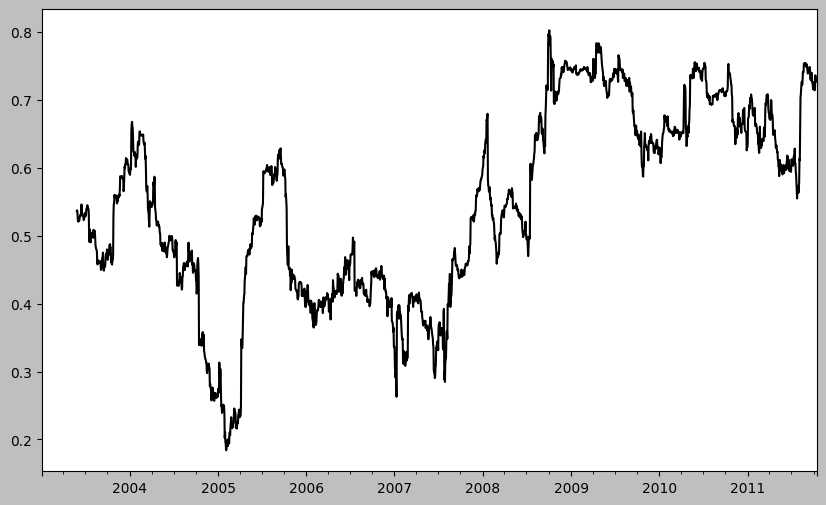

In [124]:
corr = returns["AAPL"].rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [125]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: >

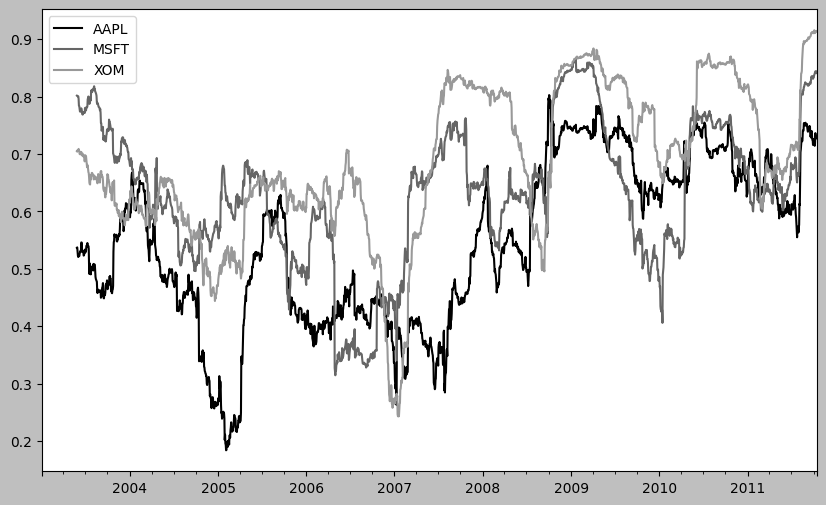

In [126]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [127]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: >

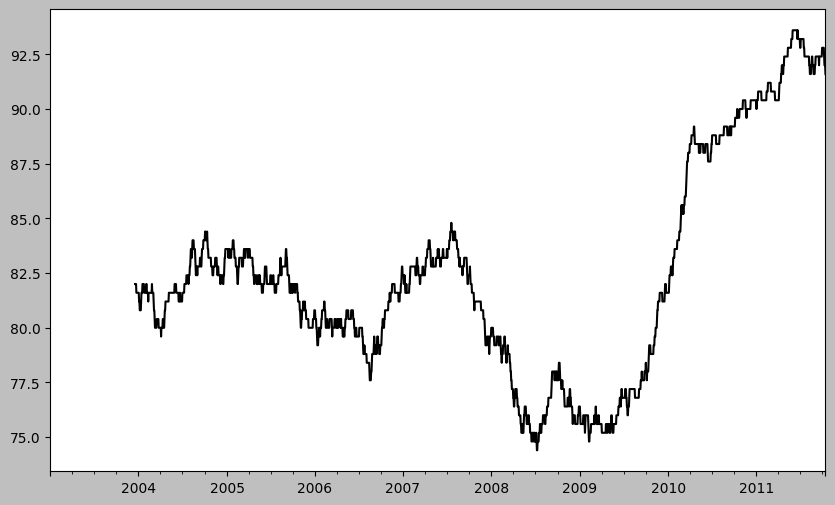

In [128]:
from scipy.stats import percentileofscore
def score_at_2percent(x):
    return percentileofscore(x, 0.02)

result = returns["AAPL"].rolling(250).apply(score_at_2percent)
result.plot()